## load dataset

In [1]:
import pandas as pd

df_kidney = pd.read_csv(r'c:\Users\Thennarasu\OneDrive\Documents\dataset\kidney_disease - kidney_disease.csv')

In [ ]:
## read data

df_kidney

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
## drop unwanted column

df_kidney.drop(['id'], axis=1, inplace=True) 

In [ ]:
## change label

df_kidney['classification'] = df_kidney['classification'].replace(['ckd','notckd'], [1,0])

C:\Users\Thennarasu\AppData\Local\Temp\ipykernel_3832\2173534127.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_kidney['classification'] = df_kidney['classification'].replace(['ckd','notckd'], [1,0])


In [ ]:
## check datatype

print(df_kidney.dtypes)


age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification      int64
dtype: object


In [ ]:
## check null value

print(df_kidney.isnull().sum())

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [ ]:
#  check percentage
print(df_kidney.isnull().mean() * 100)

age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64


In [8]:

#  Fill missing numeric values with column mean
df_numeric = df_kidney.select_dtypes(include=['float64', 'int64'])
df_kidney[df_numeric.columns] = df_numeric.fillna(df_numeric.mean())

#  Fill categorical columns with mode (most frequent value)
df_categorical = df_kidney.select_dtypes(include=['object'])
for col in df_categorical.columns:
    mode = df_kidney[col].mode()[0]
    df_kidney[col] = df_kidney[col].fillna(mode)

In [9]:
print(df_kidney.dtypes)

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification      int64
dtype: object


In [10]:
df_kidney

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38,6000,5.2,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31,7500,5.2,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35,7300,4.6,no,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47,6700,4.9,no,no,no,good,no,no,0
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54,7800,6.2,no,no,no,good,no,no,0
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49,6600,5.4,no,no,no,good,no,no,0
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,51,7200,5.9,no,no,no,good,no,no,0


In [11]:
# Find all object/categorical columns
cat_cols = df_kidney.select_dtypes(include='object').columns

In [12]:
df_kidney['classification'].value_counts(normalize=True) * 100

classification
1    62.5
0    37.5
Name: proportion, dtype: float64

In [ ]:
## encoder covert into numeric

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df_kidney[col] = le.fit_transform(df_kidney[col])

In [22]:
# Features and target
X = df_kidney.drop('classification', axis=1)  # replace 'target_column' with your target
y = df_kidney['classification']

In [23]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

In [24]:
# Optional: Apply SMOTE if needed
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)  # comment out if not using SMOTE

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
# Build Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

In [ ]:
# Predictions
y_pred = rf_model.predict(X_test)


In [ ]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

In [ ]:
## save model 

import pickle
pickle.dump(rf_model, open('kidney.pkl', 'wb'))

## EDA

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

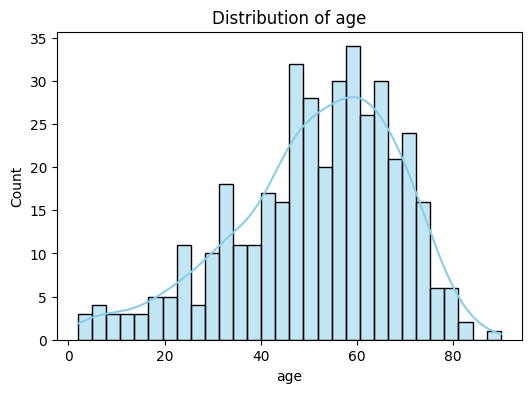

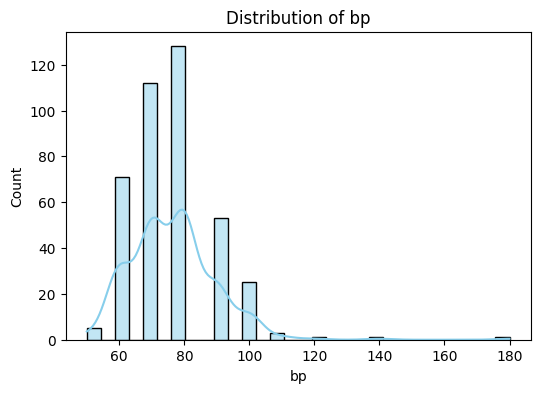

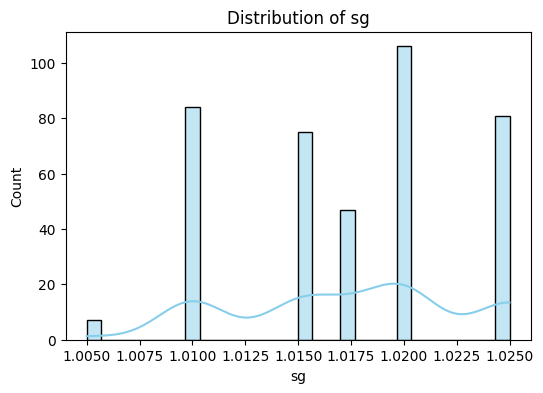

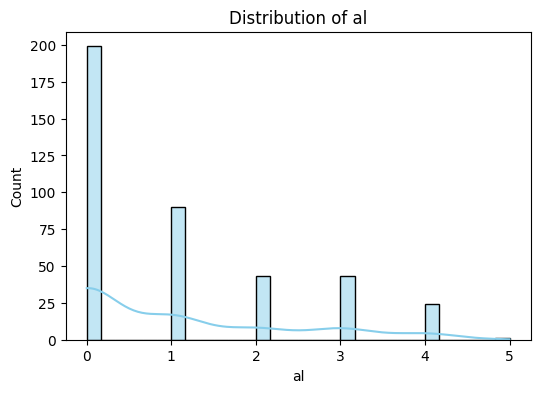

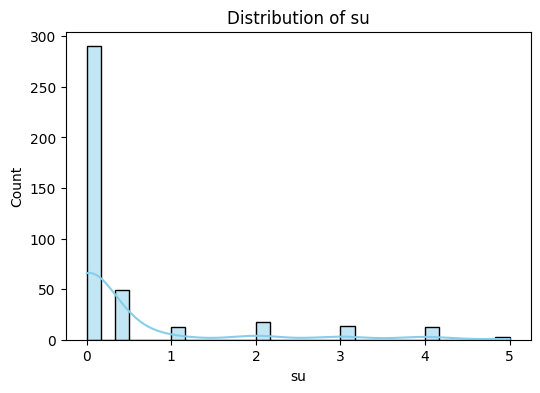

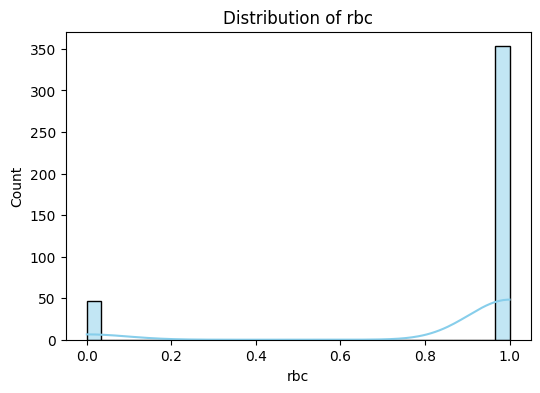

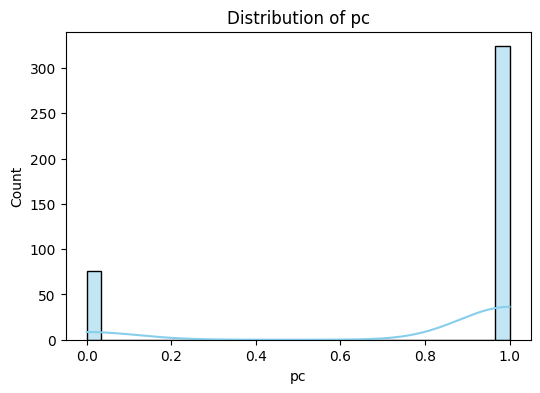

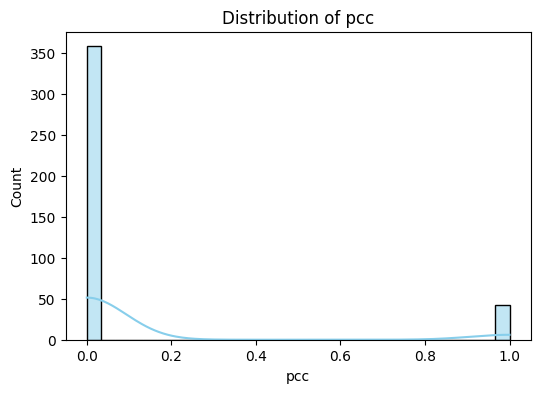

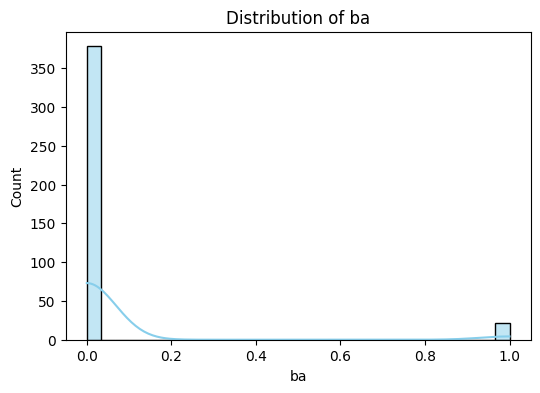

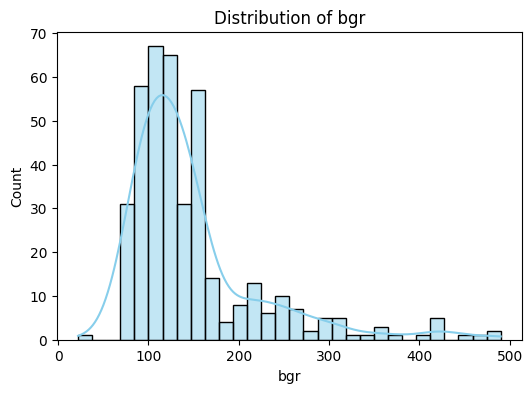

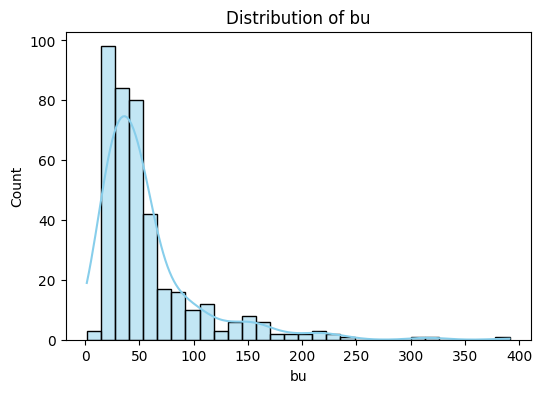

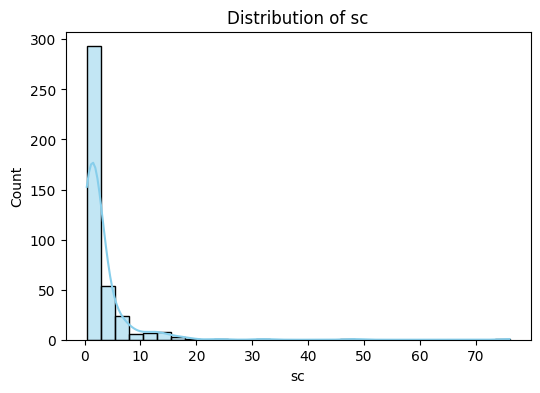

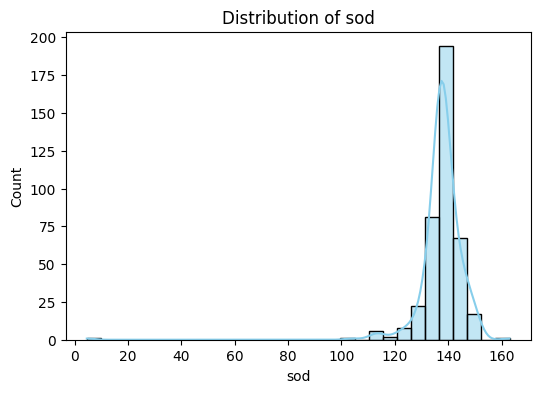

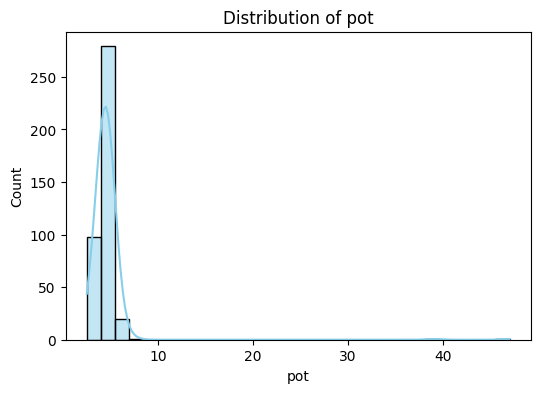

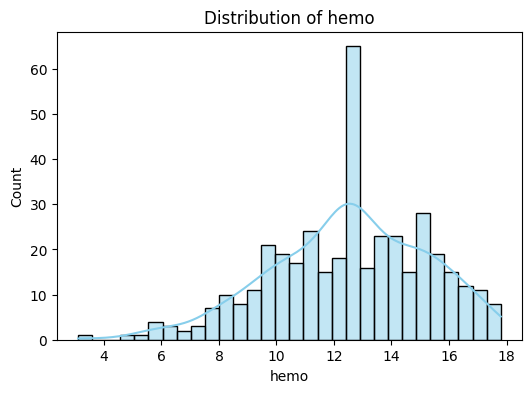

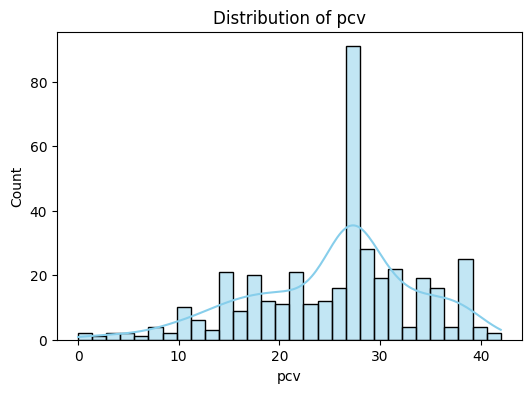

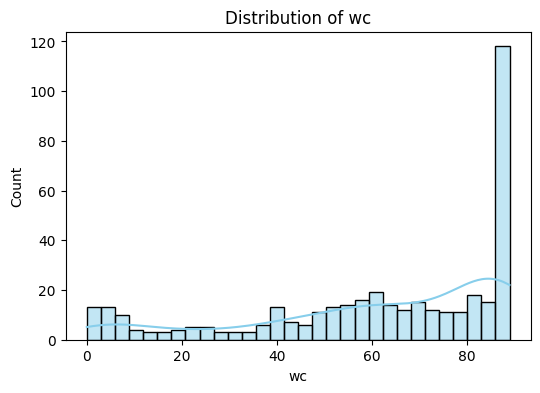

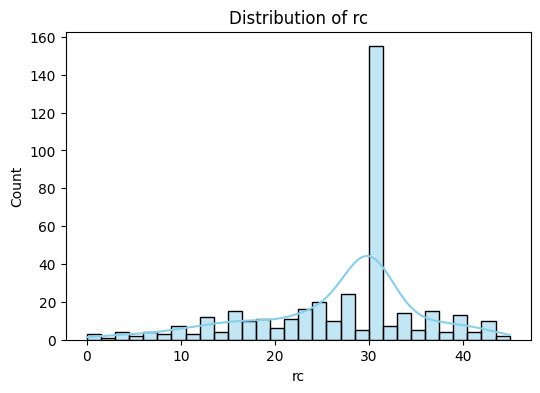

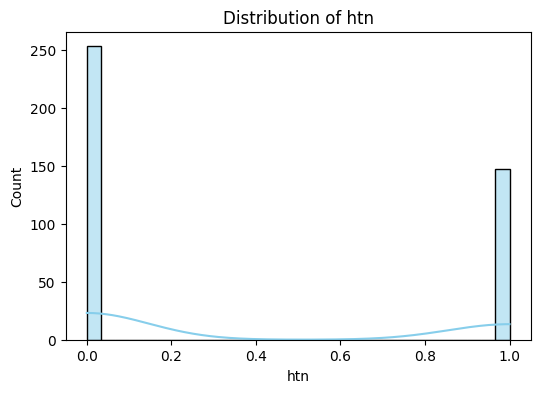

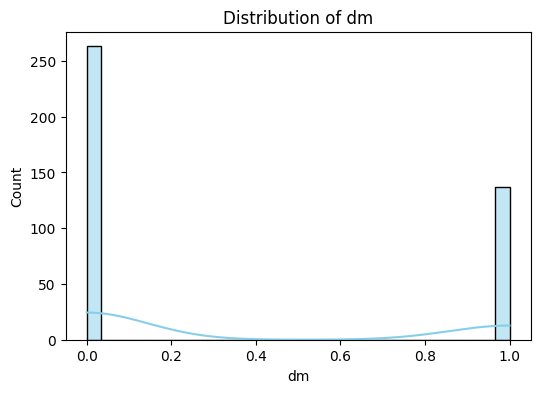

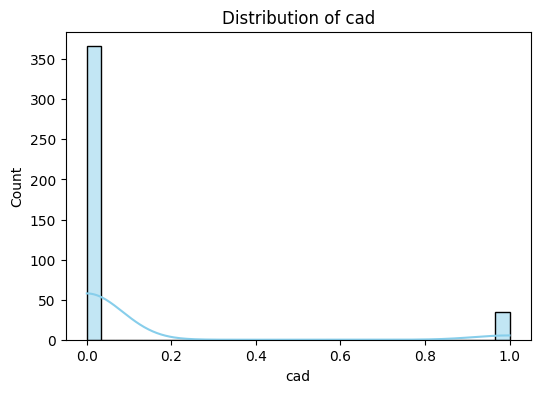

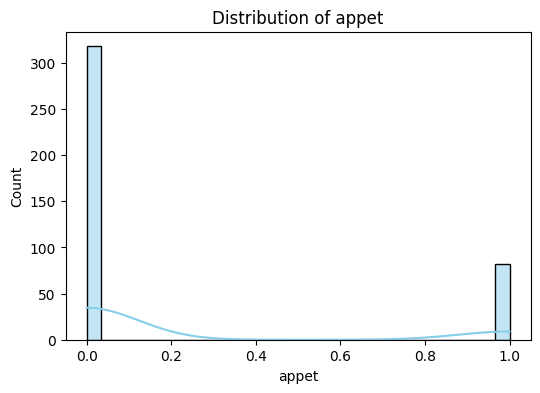

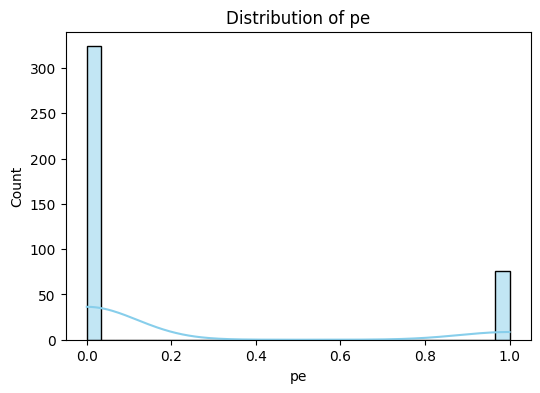

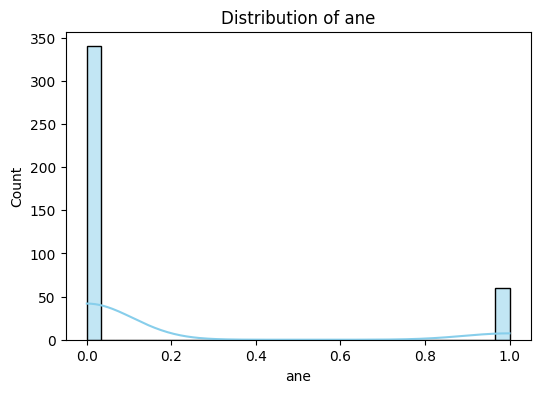

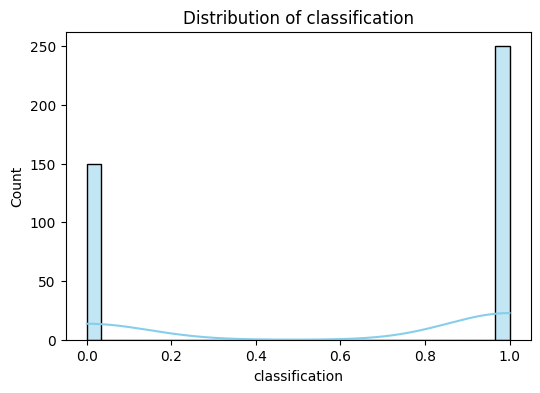

In [19]:
# ---------- DISTRIBUTION OF NUMERICAL FEATURES ----------
num_cols = df_kidney.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_kidney[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()

C:\Users\Thennarasu\AppData\Local\Temp\ipykernel_3832\722048895.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_kidney, x=target_col, palette='Set1')


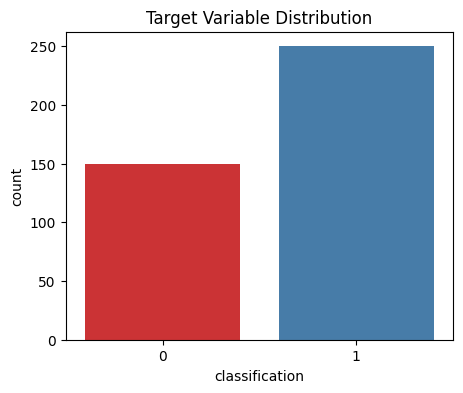

In [21]:
# ---------- TARGET VARIABLE DISTRIBUTION ----------
target_col = 'classification'  # replace with your actual target column
plt.figure(figsize=(5,4))
sns.countplot(data=df_kidney, x=target_col, palette='Set1')
plt.title('Target Variable Distribution')
plt.show()